In [1]:
%matplotlib inline
#
import os
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import random as rng
import skimage
import ipywidgets as widgets
from PIL import Image, ImageDraw, ImageFont
from matplotlib.pyplot import figure, subplot
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from skimage import data, exposure, io, filters, feature, measure
from skimage.color import rgb2gray

In [2]:
def adjust_gamma(image, gamma=1.0):
    # build a lookup table mapping the pixel values [0, 255] to
    # their adjusted gamma values
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")
    # apply gamma correction using the lookup table
    return cv.LUT(image, table)

In [3]:
def savePipsCount(img,base_img,base_img_coords,p1,p2,z):
    
    img = cv.medianBlur(img,5)
    cimg = cv.cvtColor(img,cv.COLOR_GRAY2BGR)

    circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,20,
                                param1=p1,param2=p2,minRadius=1,maxRadius=50)
    circles = np.uint16(np.around(circles))
    #print(len(circles[0]))
    font = cv.FONT_HERSHEY_SIMPLEX
    j = 0
    for i in circles[0,:]:
        cv.circle(cimg,(i[0],i[1]),i[2],(255,0,0),2)
        j+=1

    # draw the outer circle

    # draw the center of the circle
    #cv.circle(cimg,(i[0],i[1]),2,(255,0,0),3)
    img = base_img

    bottomLeftCornerOfText = (base_img_coords[0][1], base_img_coords[0][0])
    fontScale = 12
    fontColor = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
    lineType = 40
    output = (str(j))
    cv.putText(img, output, bottomLeftCornerOfText, font, fontScale,fontColor,lineType)
            
    figure(figsize=(6,6))
    ax = subplot(1,1,1)
    ax.tick_params(direction='in',labelleft=False, labelbottom = False, labelright = False)
    plt.imshow(img)
    cv.imwrite("../easy_count/latwe{}_number.jpg".format(z), img)

In [4]:
def draw_easy(dst=135, v=1.25, x=6):
    filename = "latwe{}".format(x)
    img = io.imread('../res/'+filename+'.jpg')
    image = adjust_gamma(img, v)
    gray = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
    blur = cv.medianBlur(gray, 5)
    sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    sharpen = cv.filter2D(blur, -1, sharpen_kernel)
    
    #thresh = cv.adaptiveThreshold(image,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,11,2)
    thresh = cv.threshold(sharpen,dst,255,cv.THRESH_BINARY_INV)[1]
    kernel = cv.getStructuringElement(cv.MORPH_RECT, (3,3))
    close = cv.morphologyEx(thresh, cv.MORPH_CLOSE, kernel, iterations=2)
    
    #plt.imshow(close)
    cnts = cv.findContours(close, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    min_area = 0
    max_area = 10000
    fields = []
    
    for c in cnts:
        area = cv.contourArea(c)
        fields.append(area)
    check = True
    if check:
        index = fields.index(max(fields))
        del cnts[index]
        del fields[index]
        biggest = max(fields)
        average = sum(fields)/len(fields)
        image_number = 0
        
    fields2 = fields.copy()
    dlugosc = len(fields2)
    i = 0
    while(i < dlugosc):
        if fields2[i] < max(fields2)//2:
            del fields2[i]
            del cnts[i]
            dlugosc-=1
        else:
            i+=1
    
    zooms = []
    coords = []
    for i, j in zip(cnts, fields2):
        if j > average :
            x,y,w,h = cv.boundingRect(i)
            zoom = image[y:y+h, x:x+h]
            coords.append([y+h//2, x+h//2])
            #cv.imwrite('zoom_{}.png'.format(image_number), zoom)
            #cv.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2) #rysowanie gownokwadratow
            zooms.append(zoom)
            image_number += 1
    plt.imshow(zooms[0])
    return zooms, coords
interact(draw_easy, dst=(0.0,255.0,1.0), v=(0.5,4.0,0.25), x=(0,6,1))

interactive(children=(FloatSlider(value=135.0, description='dst', max=255.0, step=1.0), FloatSlider(value=1.25…

<function __main__.draw_easy(dst=135, v=1.25, x=6)>

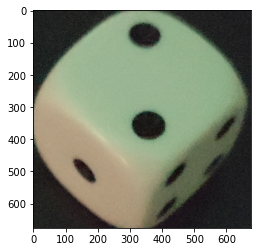

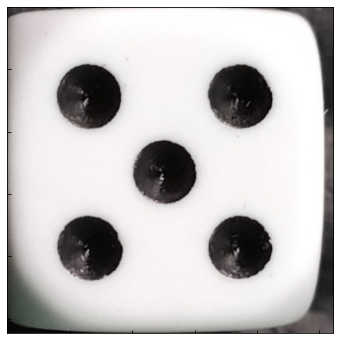

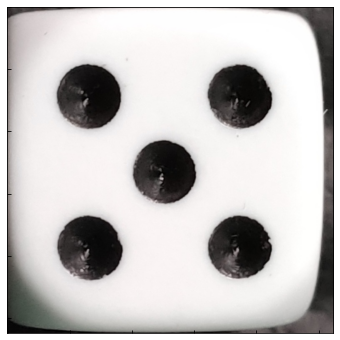

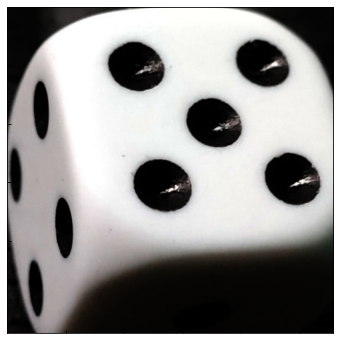

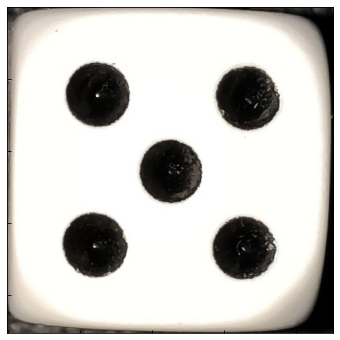

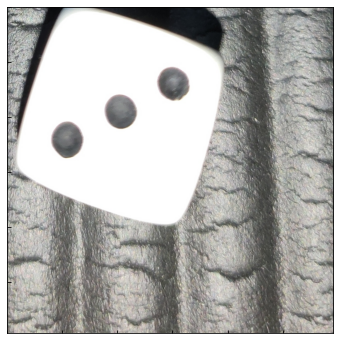

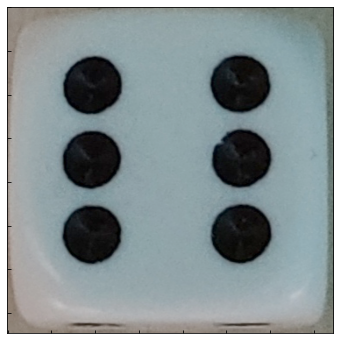

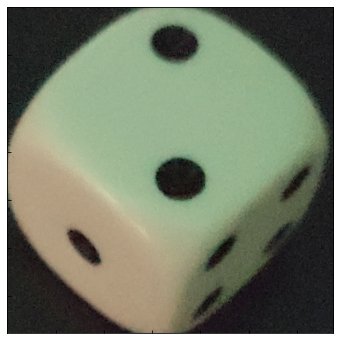

In [5]:
#zoomed
easy0_zoom, easy0_contours = draw_easy(135, 1, 0)
easy1_zoom, easy1_contours = draw_easy(135, 1, 1)
easy2_zoom, easy2_contours = draw_easy(135, 0.5, 2)
easy3_zoom, easy3_contours = draw_easy(135, 0.5, 3)
easy4_zoom, easy4_contours = draw_easy(135, 1.0, 4)
easy5_zoom, easy5_contours = draw_easy(135, 1.25, 5)
easy6_zoom, easy6_contours = draw_easy(135, 1.25, 6)

zooms_list = [easy0_zoom, easy1_zoom, easy2_zoom, easy3_zoom, easy4_zoom, easy5_zoom, easy6_zoom]
contours_list = [easy0_contours, easy1_contours, easy2_contours, easy3_contours, easy4_contours, easy5_contours, easy6_contours]
p1 = [500, 300, 300, 300, 200, 200, 200]
p2 = [20, 20, 25, 25, 25, 14, 15]
for i in range(0, len(zooms_list)):
    figure(figsize=(6,6))
    ax = subplot(1,1,1)
    ax.tick_params(direction='in',labelleft=False, labelbottom = False, labelright = False)
    plt.imshow(zooms_list[i][0])
    cv.imwrite("../zoomed/latwe{}_zoom.jpg".format(i), zooms_list[i][0])

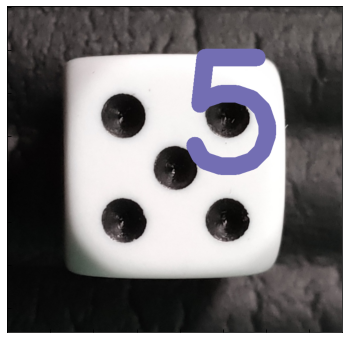

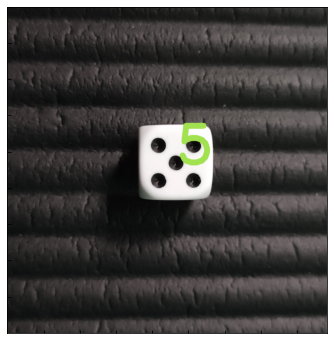

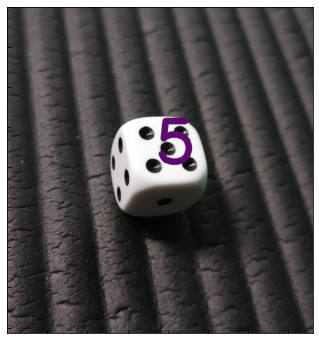

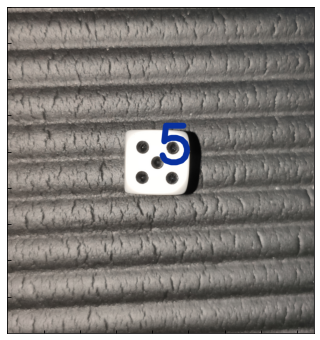

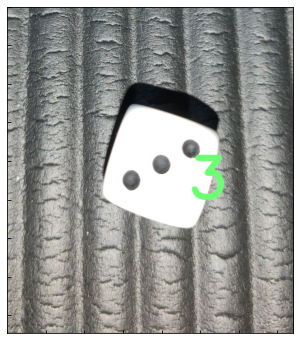

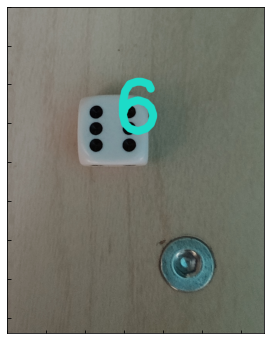

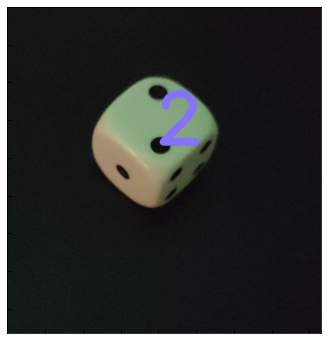

In [6]:
#licznik oczek
for i in range(0, 7):
    filename = "latwe{}".format(i)
    img = io.imread('../res/'+filename+'.jpg')
    zoomed = cv.imread('../zoomed/latwe{}_zoom.jpg'.format(i), 0)
    savePipsCount(zoomed, img, contours_list[i], p1[i], p2[i], i)

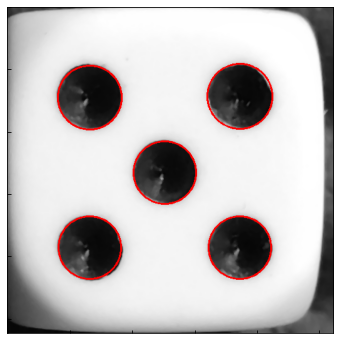

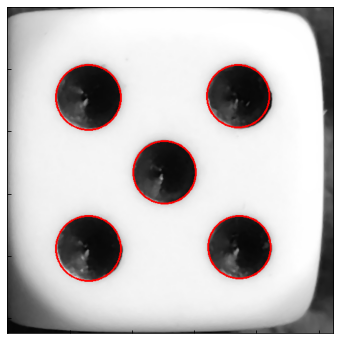

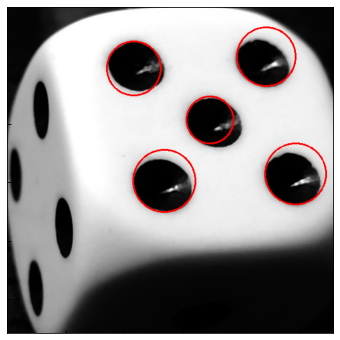

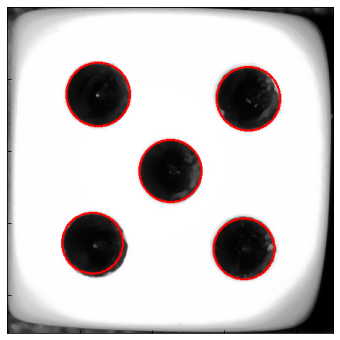

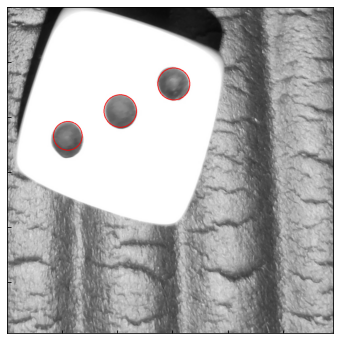

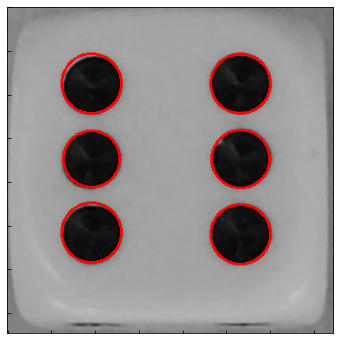

In [7]:
#kontury
for index in range(0, 6):
    filename = "latwe{}_zoom".format(index)
    img = cv.imread('../zoomed/'+filename+'.jpg', 0)
    img = cv.medianBlur(img,5)
    cimg = cv.cvtColor(img,cv.COLOR_GRAY2BGR)
    circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,20,
                            param1=300,param2=25,minRadius=0,maxRadius=60)
    circles = np.uint16(np.around(circles))
    for i in circles[0,:]:
        # draw the outer circle
        cv.circle(cimg,(i[0],i[1]),i[2],(255,0,0),2)
    
    figure(figsize=(6,6))
    ax = subplot(1,1,1)
    ax.tick_params(direction='in',labelleft=False, labelbottom = False, labelright = False)
    plt.imshow(cimg)
    cv.imwrite("../contours/latwe{}_contours.jpg".format(index), cimg)
    #plt.imshow(cimg)

In [8]:
#TODO
def draw_medium(dst=160, v=1.25, x=13):
    filename = "projekt{}".format(x)
    img = io.imread('../res/'+filename+'.jpg')
    image = adjust_gamma(img, v)
    gray = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
    blur = cv.medianBlur(gray, 5)
    sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    sharpen = cv.filter2D(blur, -1, sharpen_kernel)
    
    #thresh = cv.adaptiveThreshold(image,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,11,2)
    thresh = cv.threshold(sharpen,dst,255,cv.THRESH_BINARY_INV)[1]
    kernel = cv.getStructuringElement(cv.MORPH_RECT, (3,3))
    close = cv.morphologyEx(thresh, cv.MORPH_CLOSE, kernel, iterations=2)
    
    plt.imshow(close)
    
    cnts = cv.findContours(close, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    min_area = 0
    max_area = 10000
    fields = []
    
    for c in cnts:
        area = cv.contourArea(c)
        fields.append(area)
    check = True
    if check:
        index = fields.index(max(fields))
        del cnts[index]
        del fields[index]
        biggest = max(fields)
        average = sum(fields)/len(fields)
        image_number = 0
        
    fields2 = fields.copy()
    dlugosc = len(fields2)
    i = 0
    while(i < dlugosc):
        if fields2[i] < max(fields2)//2:
            del fields2[i]
            del cnts[i]
            dlugosc-=1
        else:
            i+=1
    
    zooms = []
    coords = []
    for i, j in zip(cnts, fields2):
        if j > average:
            x,y,w,h = cv.boundingRect(i)
            zoom = image[y:y+h, x:x+h]
            coords.append([y+h//2, x+h//2])
            #cv.imwrite('zoom_{}.png'.format(image_number), zoom)
            #cv.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2) #rysowanie gownokwadratow
            zooms.append(zoom)
            image_number += 1
            
    print(len(zooms))
    #figure(figsize=(6,6))
    for i in range(0, len(zooms)):
        figure(figsize=(6,6))
        ax = subplot(1,1,1)
        plt.imshow(zooms[i])
    #plt.imshow(zooms[0])
    #return zooms, coords
interact(draw_medium, dst=(0.0,255.0,1.0), v=(0.5,4.0,0.25), x=(10,18,1))

interactive(children=(FloatSlider(value=160.0, description='dst', max=255.0, step=1.0), FloatSlider(value=1.25…

<function __main__.draw_medium(dst=160, v=1.25, x=13)>

In [9]:
# image = cv.imread('../res/projekt17.jpg')
# gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
# blur = cv.medianBlur(gray, 5)
# sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
# sharpen = cv.filter2D(blur, -1, sharpen_kernel)

# thresh = cv.threshold(sharpen,160,255, cv.THRESH_BINARY_INV)[1]
# kernel = cv.getStructuringElement(cv.MORPH_RECT, (3,3))
# close = cv.morphologyEx(thresh, cv.MORPH_CLOSE, kernel, iterations=2)

# cnts = cv.findContours(close, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
# cnts = cnts[0] if len(cnts) == 2 else cnts[1]
# temp = []
# for i in cnts:
#     area = cv.contourArea(i)
#     temp.append(area)
# min_area = min(temp)
# max_area = max(temp)
# image_number = 0
# average = sum(temp)/len(temp)
# for c in cnts:
#     area = cv.contourArea(c)
#     if area > average and area < max_area:
#         x,y,w,h = cv.boundingRect(c)
#         ROI = image[y:y+h, x:x+h]
#         cv.imwrite('ROI_{}.png'.format(image_number), ROI)
#         #cv.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)
#         image_number += 1
        
#cv.imshow('sharpen', sharpen)
#cv.imshow('close', close)
#cv.imshow('thresh', thresh)
#cv.imshow('image', image)
#cv.waitKey()